# Data Fitting

In [1]:
from pylab import *
from scipy.optimize import curve_fit


In [2]:
xdata,ydata=loadtxt('FakeData.txt',unpack=True)


In [3]:
print(xdata)

[8.213 7.402 6.876 5.491 5.196]


In [4]:
print(ydata)

[3.107 2.551 2.2   1.306 1.11 ]


In [5]:
def linearFunc(x,intercept,slope):
 y = intercept + slope * x
 return y

In [6]:
linearFunc(1,2,3)

5

In [7]:
a_fit,cov=curve_fit(linearFunc,xdata,ydata)

In [8]:
inter = a_fit[0]
slope = a_fit[1]
print(cov)

[[ 1.06510152e-03 -1.55899107e-04]
 [-1.55899107e-04  2.34943498e-05]]


In [9]:
d_inter = sqrt(cov[0][0])
d_slope = sqrt(cov[1][1])

Text(0.5, 1.0, 'Plot of data with fit')

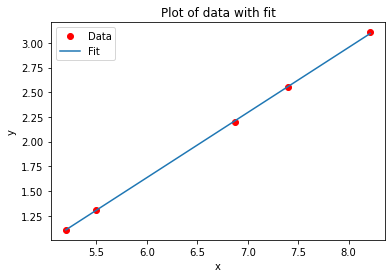

In [10]:
# Create a graph showing the data.
plot(xdata,ydata,'ro',label='Data')
# Compute a best fit y values from the fit intercept and slope.
yfit = inter + slope*xdata

# Create a graph of the fit to the data.
plot(xdata,yfit,label='Fit')

# Display a legend, label the x and y axes and title the graph.
legend()
xlabel('x')
ylabel('y')
title('Plot of data with fit')

In [11]:
# Display the best fit values for the slope and intercept. These print
# statments illustrate how to print a mix of strings and variables.
print(f'The slope = {slope}, with uncertainty {d_slope}')
print(f'The intercept = {inter}, with uncertainty {d_inter}')

The slope = 0.6587176810599606, with uncertainty 0.004847097046293064
The intercept = -2.3161870444414747, with uncertainty 0.03263589309955411


# With Error

In [12]:
def linearFunc(x,intercept,slope):
 y = intercept + slope * x
 return y

In [13]:
xdata,ydata,d_y = loadtxt('FakeData_with_error.txt',unpack=True)

In [14]:
print(xdata)

[8.213 7.402 6.876 5.491 5.196]


In [15]:
print(ydata)

[3.261 2.52  2.239 1.299 1.175]


In [16]:
print(d_y)

[0.0971 0.0559 0.0708 0.0683 0.0893]


In [17]:
a_fit,cov=curve_fit(linearFunc,xdata,ydata,sigma=d_y)

In [18]:
inter = a_fit[0] 
slope = a_fit[1]
d_inter = sqrt(cov[0][0])
d_slope = sqrt(cov[1][1])

Text(0, 0.5, 'y')

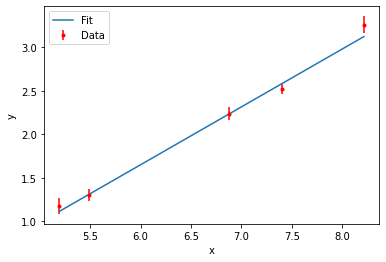

In [19]:
# Create a graph showing the data.
errorbar(xdata,ydata,yerr=d_y,fmt='r.',label='Data')
# Compute a best fit line from the fit intercept and slope.
yfit = inter + slope*xdata
# Create a graph of the fit to the data. We just use the ordinary plot
# command for this.
plot(xdata,yfit,label='Fit')
# Display a legend, label the x and y axes and title the graph.
legend()
xlabel('x')
ylabel('y')

In [20]:
print(f'The slope = {slope}, with uncertainty {d_slope}')
print(f'The intercept = {inter}, with uncertainty {d_inter}')

The slope = 0.6656028702881751, with uncertainty 0.03549213604200107
The intercept = -2.3430681719234285, with uncertainty 0.239532487804196


In [21]:
chisqr = sum((ydata-linearFunc(xdata,inter,slope))**2/d_y**2)
dof = len(ydata) - 2
chisqr_red = chisqr/dof
print(f'Reduced chi^2 = {chisqr_red}')

Reduced chi^2 = 1.2633310164063059


# Conclusion

I performed data fitting for the given data in a linear function of form y=mx+c

In the second part we performed the data fitting for a data with  given error and performed the chi square test to check the fitting , reduced chi^2 value was near 1 so it indicates that the data has been fitted accurately.